In [1]:
import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly as py
import plotly.graph_objs as go

import ipywidgets as widgets

import pandas as pd
import datetime
import seaborn as sb

In [2]:
sb.set()

In [3]:
py.offline.init_notebook_mode(connected = True)

### Time Series Plot of 3,5-Dibromophenylacetic acid (Metabolite_id = 2314)

In [4]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select metabolite_id, 
                                        metab_name,
                                        provider_name, 
                                        date, 
                                        max(price_per_g) as maximo, 
                                        avg(price_per_g) as media, 
                                        min(price_per_g) as minimo, 
                                        count(price) as num_price
                                        from (
                                                select bioanalysis_metabolite_price.metabolite_id,
                                                       bioanalysis_metabolite.common_name                    as metab_name,
                                                       bioanalysis_metabolite_price.date, 
                                                       bioanalysis_metabolite_price.price                    as price, 
                                                       bioanalysis_metabolite_price.amount                   as amount, 
                                                       bioanalysis_metabolite_price.unity                    as unity, 
                                                       if(provider.name is null, "None", provider.name)      as provider_name, 
                                                       price/amount                                          as price_per_unity,
                                                       price/amount*convert_to_g(unity)                      as price_per_g,
                                                       price/amount*convert_to_l(unity)                      as price_per_l
                                                from bioanalysis_metabolite_price
                                                JOIN provider 
                                                    on provider.id = bioanalysis_metabolite_price.provider_id
                                                JOIN bioanalysis_metabolite
                                                    on bioanalysis_metabolite_price.metabolite_id = bioanalysis_metabolite.id
                                                where (convert_to_g(unity) is not null 
                                                or convert_to_l(unity) is not null )       #da apenas os preços por grama, litro e derivados
                                        ) as metab_prices
                                        where metabolite_id= 2314
                                        group by metabolite_id, provider_name, date; ''', cnx, index_col = 'date', parse_dates=True) 


df = pd.DataFrame(sql_query, columns=['metabolite_id', 'metab_name', 'provider_name', 'maximo', 'media', 'minimo', 'num_price' ])



In [5]:
df

,metabolite_id,metab_name,provider_name,maximo,media,minimo,num_price
date,,,,,,,
2017-10-09 09:33:36,2314,"3,5-Dibromophenylacetic acid","AK Scientific, Inc.",20.000,12.933333,9.0000,3
2017-10-09 09:33:36,2314,"3,5-Dibromophenylacetic acid","Ark Pharm, Inc.",10.000,6.350000,3.7500,5
2017-10-09 09:33:36,2314,"3,5-Dibromophenylacetic acid",Fluorochem Limited,13.900,7.704075,4.0171,4
2017-10-09 09:33:36,2314,"3,5-Dibromophenylacetic acid","Bepharm, Ltd.",11.800,10.620000,9.4400,2
2017-10-09 09:33:36,2314,"3,5-Dibromophenylacetic acid",Bide Pharmatech Ltd.,10.000,6.350000,3.7500,5
2017-10-09 09:33:36,2314,"3,5-Dibromophenylacetic acid",Oxchem Corporation,13.000,9.830000,7.5200,4
2017-10-09 09:33:36,2314,"3,5-Dibromophenylacetic acid",Angene,84.000,37.906667,7.9200,3
2017-10-09 09:33:36,2314,"3,5-Dibromophenylacetic acid",Labseeker,42.160,37.945000,33.7300,2
2017-10-09 09:33:36,2314,"3,5-Dibromophenylacetic acid","Combi-Blocks, Inc.",19.400,14.916667,11.4700,3


c:\users\sofia\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



Text(0, 0.5, 'Price (USD)')

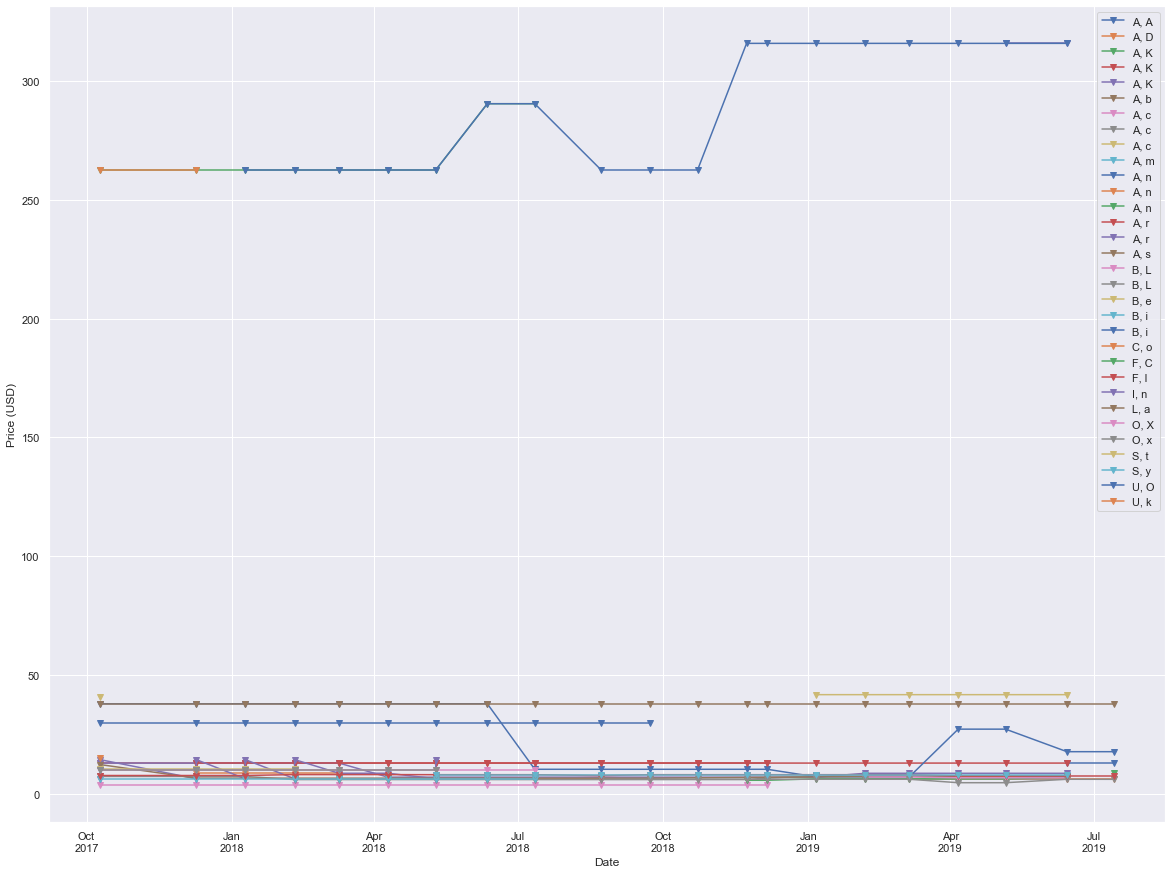

In [6]:
#Create plot!!
df = df.sort_index()

fig, ax = plt.subplots(figsize=(20, 15))
for k,g in df.groupby(['provider_name'])['media']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))

#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
#plt.show()

In [7]:
grouped_df = df.groupby('provider_name')

for key, item in grouped_df:
    print('key:', key)
    print(grouped_df.get_group(key), "\n\n")

key: AA BLOCKS
                     metabolite_id                    metab_name  \
date                                                               
2019-06-13 19:17:07           2314  3,5-Dibromophenylacetic acid   
2019-07-13 19:18:39           2314  3,5-Dibromophenylacetic acid   

                    provider_name  maximo  media  minimo  num_price  
date                                                                 
2019-06-13 19:17:07     AA BLOCKS    12.8   12.8    12.8          1  
2019-07-13 19:18:39     AA BLOCKS    12.8   12.8    12.8          1   


key: AD Chemical Inc.
                     metabolite_id                    metab_name  \
date                                                               
2017-12-09 10:52:33           2314  3,5-Dibromophenylacetic acid   
2018-01-09 10:52:44           2314  3,5-Dibromophenylacetic acid   
2018-02-09 18:29:41           2314  3,5-Dibromophenylacetic acid   
2018-03-09 20:24:06           2314  3,5-Dibromophenylacetic acid   

2019-06-13 19:17:07          4   


key: UkrOrgSyntez Ltd Chemspace partner
                     metabolite_id                    metab_name  \
date                                                               
2017-10-09 09:33:37           2314  3,5-Dibromophenylacetic acid   
2017-12-09 10:52:33           2314  3,5-Dibromophenylacetic acid   

                                          provider_name  maximo    media  \
date                                                                       
2017-10-09 09:33:37  UkrOrgSyntez Ltd Chemspace partner   542.0  262.615   
2017-12-09 10:52:33  UkrOrgSyntez Ltd Chemspace partner   542.0  262.615   

                     minimo  num_price  
date                                    
2017-10-09 09:33:37   44.96          4  
2017-12-09 10:52:33   44.96          8   




In [8]:
#Create plot with plotly

df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of Picroside III (1g)',
    yaxis = dict(
        title = 'price(USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)

prov_list = []
for key, item in grouped_df:
    prov_list.append(key)
    

d_x = {}
d_y = {}
for k,g in df.groupby(['provider_name'])['media']:
    x = pd.to_datetime(g.index)
    y = g.values
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a provider lacking on the x or y dict.')
    


def update_plot(signals):#, freq):
   data = []
   for s in signals:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines+markers',
           name = 'provider {}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
signals = widgets.SelectMultiple(options = prov_list, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('AA BLOCKS', 'AD Chemical Inc.', 'AK Sci…